In [3]:
!pip install -q folium

In [4]:
import pandas as pd
import numpy as np

# Load GNSS data from file
# Replace 'gnss_data.csv' with your actual file path
gnss_data = pd.read_csv('gnss_dataset.csv')

# Display basic information about the dataset
print("GNSS Data Shape:", gnss_data.shape)
print("\nColumn Names:")
print(gnss_data.columns.tolist())
print("\nFirst few rows:")
print(gnss_data.head())

GNSS Data Shape: (1200, 6)

Column Names:
['timestamp', 'latitude', 'longitude', 'accuracy_meters', 'satellite_count', 'hdop']

First few rows:
                    timestamp   latitude   longitude  accuracy_meters  \
0  2025-05-28 16:14:57.835425  37.774910 -122.419432         3.106680   
1  2025-05-28 16:14:58.835425  37.774916 -122.419387         3.756110   
2  2025-05-28 16:14:59.835425  37.774961 -122.419378         3.657588   
3  2025-05-28 16:15:00.835425  37.774967 -122.419355         3.400034   
4  2025-05-28 16:15:01.835425  37.774959 -122.419405        10.571930   

   satellite_count      hdop  
0                7  1.198674  
1                9  0.920339  
2                7  0.934689  
3                7  1.273710  
4                8  1.050595  


In [5]:

# Drop the specified columns
gnss_data = gnss_data.drop(['accuracy_meters', 'satellite_count', 'hdop'], axis=1)

print("Updated GNSS Data Shape:", gnss_data.shape)
print("\nRemaining columns:")
print(gnss_data.columns.tolist())
print("\nFirst few rows:")


Updated GNSS Data Shape: (1200, 3)

Remaining columns:
['timestamp', 'latitude', 'longitude']

First few rows:


In [6]:
print(gnss_data.head(20))

                     timestamp   latitude   longitude
0   2025-05-28 16:14:57.835425  37.774910 -122.419432
1   2025-05-28 16:14:58.835425  37.774916 -122.419387
2   2025-05-28 16:14:59.835425  37.774961 -122.419378
3   2025-05-28 16:15:00.835425  37.774967 -122.419355
4   2025-05-28 16:15:01.835425  37.774959 -122.419405
5   2025-05-28 16:15:02.835425  37.774716 -122.419181
6   2025-05-28 16:15:03.835425  37.774914 -122.419357
7   2025-05-28 16:15:04.835425  37.774957 -122.419269
8   2025-05-28 16:15:05.835425  37.774945 -122.419387
9   2025-05-28 16:15:06.835425  37.774940 -122.419383
10  2025-05-28 16:15:07.835425  37.774919 -122.419319
11  2025-05-28 16:15:08.835425  37.774912 -122.419300
12  2025-05-28 16:15:09.835425  37.774921 -122.419248
13  2025-05-28 16:15:10.835425  37.774959 -122.419218
14  2025-05-28 16:15:11.835425  37.774919 -122.419213
15  2025-05-28 16:15:12.835425  37.775020 -122.419209
16  2025-05-28 16:15:13.835425  37.774957 -122.419266
17  2025-05-28 16:15:14.8354

In [7]:
import folium

# Create a map centered on the mean coordinates
center_lat = gnss_data['latitude'].mean()
center_lon = gnss_data['longitude'].mean()

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)

# Create a list of coordinates for the line
coordinates = [[row['latitude'], row['longitude']] for idx, row in gnss_data.iterrows()]

# Add a polyline connecting all points
folium.PolyLine(
    locations=coordinates,
    color='red',
    weight=2,
    opacity=0.8
).add_to(m)

# Display the map
m

In [8]:
!pip install -q geopy

In [9]:
from geopy.distance import geodesic
from datetime import datetime

# Calculate speed based on distance between consecutive points and time difference

# Convert timestamp to datetime objects
gnss_data['timestamp'] = pd.to_datetime(gnss_data['timestamp'])

# Initialize speed list
speeds = [0]  # First point has speed 0

# Calculate speed for each subsequent point
for i in range(1, len(gnss_data)):
    # Get current and previous coordinates
    prev_point = (gnss_data.iloc[i-1]['latitude'], gnss_data.iloc[i-1]['longitude'])
    curr_point = (gnss_data.iloc[i]['latitude'], gnss_data.iloc[i]['longitude'])
    
    # Calculate distance in meters
    distance = geodesic(prev_point, curr_point).meters
    
    # Calculate time difference in seconds
    time_diff = (gnss_data.iloc[i]['timestamp'] - gnss_data.iloc[i-1]['timestamp']).total_seconds()
    
    # Calculate speed in m/s
    if time_diff > 0:
        speed_ms = distance / time_diff
    else:
        speed_ms = 0
    
    speeds.append(speed_ms)

# Add speed column to dataframe
gnss_data['speed_ms'] = speeds
gnss_data['speed_kmh'] = gnss_data['speed_ms'] * 3.6  # Convert to km/h

print("Speed calculation completed!")
print(f"Average speed: {gnss_data['speed_ms'].mean():.2f} m/s ({gnss_data['speed_kmh'].mean():.2f} km/h)")
print(f"Max speed: {gnss_data['speed_ms'].max():.2f} m/s ({gnss_data['speed_kmh'].max():.2f} km/h)")
print("\nFirst 10 rows with speed:")
print(gnss_data[['timestamp', 'latitude', 'longitude', 'speed_ms', 'speed_kmh']].head(10))

Speed calculation completed!
Average speed: 8.11 m/s (29.19 km/h)
Max speed: 44.22 m/s (159.20 km/h)

First 10 rows with speed:
                   timestamp   latitude   longitude   speed_ms   speed_kmh
0 2025-05-28 16:14:57.835425  37.774910 -122.419432   0.000000    0.000000
1 2025-05-28 16:14:58.835425  37.774916 -122.419387   3.947993   14.212776
2 2025-05-28 16:14:59.835425  37.774961 -122.419378   5.125052   18.450188
3 2025-05-28 16:15:00.835425  37.774967 -122.419355   2.064349    7.431655
4 2025-05-28 16:15:01.835425  37.774959 -122.419405   4.478600   16.122960
5 2025-05-28 16:15:02.835425  37.774716 -122.419181  33.427483  120.338941
6 2025-05-28 16:15:03.835425  37.774914 -122.419357  26.940617   96.986221
7 2025-05-28 16:15:04.835425  37.774957 -122.419269   9.099653   32.758750
8 2025-05-28 16:15:05.835425  37.774945 -122.419387  10.462349   37.664457
9 2025-05-28 16:15:06.835425  37.774940 -122.419383   0.587775    2.115989


/tmp/ipykernel_150851/620232043.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.9479934431228485' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gnss_data.iloc[i, gnss_data.columns.get_loc('cumulative_distance')] = cumulative_dist


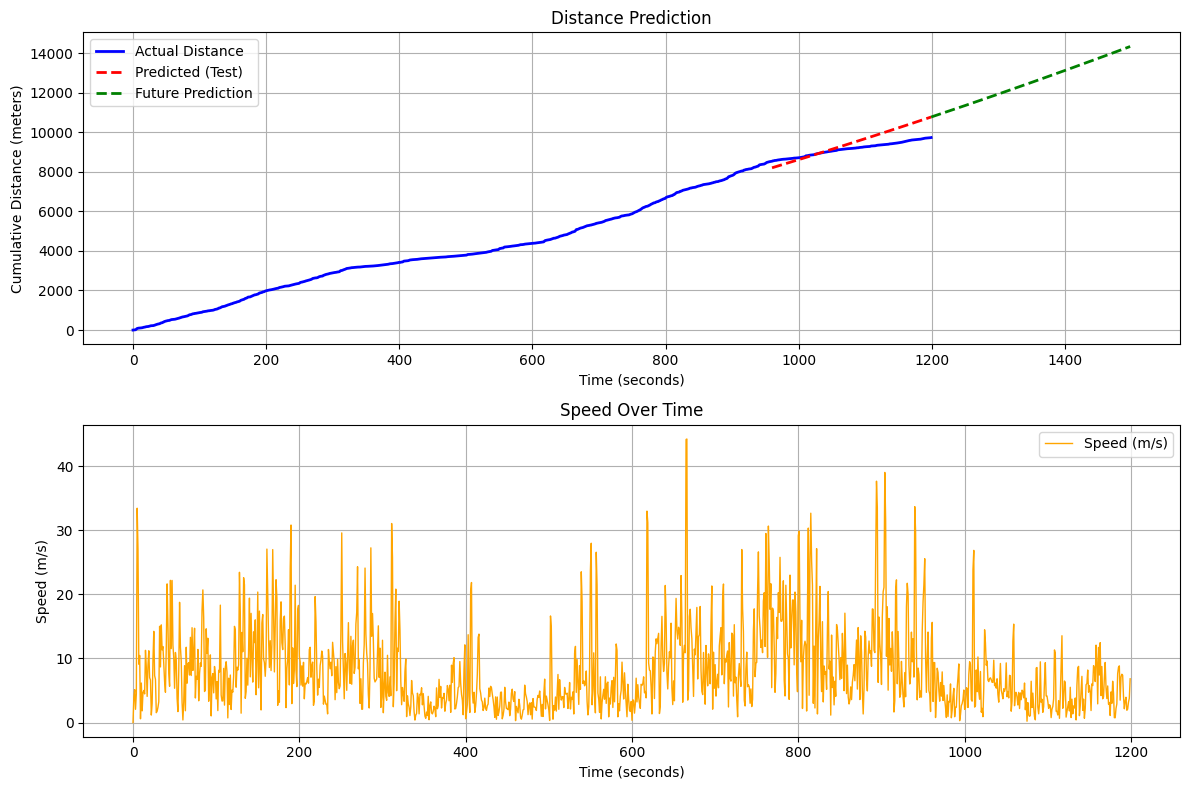

Model R² Score: -1.2117
Mean Squared Error: 260680.45

Current total distance: 9730.08 meters
Predicted distance in 5 minutes: 14333.08 meters
Additional distance in next 5 minutes: 4603.00 meters


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Calculate cumulative distance
gnss_data['cumulative_distance'] = 0
cumulative_dist = 0

for i in range(1, len(gnss_data)):
    prev_point = (gnss_data.iloc[i-1]['latitude'], gnss_data.iloc[i-1]['longitude'])
    curr_point = (gnss_data.iloc[i]['latitude'], gnss_data.iloc[i]['longitude'])
    distance = geodesic(prev_point, curr_point).meters
    cumulative_dist += distance
    gnss_data.iloc[i, gnss_data.columns.get_loc('cumulative_distance')] = cumulative_dist

# Create time features for prediction
gnss_data['time_seconds'] = (gnss_data['timestamp'] - gnss_data['timestamp'].iloc[0]).dt.total_seconds()

# Prepare data for prediction
X = gnss_data['time_seconds'].values.reshape(-1, 1)
y = gnss_data['cumulative_distance'].values

# Split data for training (use 80% for training, 20% for testing future prediction)
split_point = int(0.8 * len(gnss_data))
X_train = X[:split_point]
y_train = y[:split_point]
X_test = X[split_point:]
y_test = y[split_point:]

# Create polynomial features for better fit
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on test data
y_pred = model.predict(X_test_poly)

# Predict future distances (next 5 minutes)
future_times = np.arange(X[-1][0], X[-1][0] + 300, 1).reshape(-1, 1)  # Next 5 minutes
future_times_poly = poly_features.transform(future_times)
future_distances = model.predict(future_times_poly)

# Plot results
plt.figure(figsize=(12, 8))

# Plot actual data
plt.subplot(2, 1, 1)
plt.plot(gnss_data['time_seconds'], gnss_data['cumulative_distance'], 'b-', label='Actual Distance', linewidth=2)
plt.plot(X_test.flatten(), y_pred, 'r--', label='Predicted (Test)', linewidth=2)
plt.plot(future_times.flatten(), future_distances, 'g--', label='Future Prediction', linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Distance (meters)')
plt.title('Distance Prediction')
plt.legend()
plt.grid(True)

# Plot speed over time
plt.subplot(2, 1, 2)
plt.plot(gnss_data['time_seconds'], gnss_data['speed_ms'], 'orange', label='Speed (m/s)', linewidth=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/s)')
plt.title('Speed Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print prediction metrics
print(f"Model R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"\nCurrent total distance: {gnss_data['cumulative_distance'].iloc[-1]:.2f} meters")
print(f"Predicted distance in 5 minutes: {future_distances[-1]:.2f} meters")
print(f"Additional distance in next 5 minutes: {future_distances[-1] - gnss_data['cumulative_distance'].iloc[-1]:.2f} meters")

In [16]:
import math

def predict_future_distance(current_long, current_lat, target_long, target_lat, direction, speed) -> int:
    """
    Predict future distance based on current position, direction, and speed.
    
    Parameters:
    long (float): Current longitude
    lat (float): Current latitude  
    direction (float): Direction in degrees (0-360, where 0 is North)
    speed (float): Speed in m/s
    
    Returns:
    dict: Dictionary containing predicted coordinates and distance after 1 minute
    """
    
    # Time step (1 minute = 60 seconds)
    time_step = 60
    
    # Calculate distance traveled in 1 minute
    distance_traveled = speed * time_step
    
    # Convert direction to radians (adjust for coordinate system where 0 is North)
    direction_rad = math.radians(direction)
    
    # Calculate change in coordinates
    # Using approximate conversion: 1 degree lat ≈ 111,111 meters
    # 1 degree lon ≈ 111,111 * cos(lat) meters
    lat_change = (distance_traveled * math.cos(direction_rad)) / 111111.0
    lon_change = (distance_traveled * math.sin(direction_rad)) / (111111.0 * math.cos(math.radians(current_lat)))
    
    # Calculate new position
    new_lat = current_lat + lat_change
    new_lon = current_long + lon_change
    
    # Calculate cumulative distance using the model for future prediction
    current_time = gnss_data['time_seconds'].iloc[-1]
    future_time = current_time + time_step
    
    # Use the trained model to predict cumulative distance
    future_time_poly = poly_features.transform([[future_time]])
    predicted_cumulative_distance = model.predict(future_time_poly)[0]
    
    return {
        'predicted_latitude': new_lat,
        'predicted_longitude': new_lon,
        'distance_traveled': distance_traveled,
        'predicted_cumulative_distance': predicted_cumulative_distance,
        'time_seconds': future_time
    }

print("Predicting future position based on current speed and direction...")

# Example usage
current_long = gnss_data['longitude'].iloc[0]
current_lat = gnss_data['latitude'].iloc[0]
current_speed = gnss_data['speed_ms'].iloc[0]  # Speed in m/s
current_direction = 90  # Example direction in degrees (0-360, where 0 is North)
target_long = gnss_data['longitude'].iloc[-1]  # Target longitude (for simplicity, using current position)
target_lat = gnss_data['latitude'].iloc[-1]  # Target latitude (for simplicity, using current position)

future_prediction = predict_future_distance(current_long, current_lat, target_long, target_lat,current_direction, current_speed)
print("\nFuture Prediction after 1 minute:")
print(f"Predicted Latitude: {future_prediction['predicted_latitude']:.6f}")
print(f"Predicted Longitude: {future_prediction['predicted_longitude']:.6f}")
print(f"Distance Traveled in 1 minute: {future_prediction['distance_traveled']:.2f} meters")
print(f"Predicted Cumulative Distance: {future_prediction['predicted_cumulative_distance']:.2f} meters")

# Visualize the future prediction on the map
m_future = folium.Map(location=[center_lat, center_lon], zoom_start=15)
# Add the original polyline
folium.PolyLine(
    locations=coordinates,
    color='red',
    weight=2,
    opacity=0.8
).add_to(m_future)
# Add the future predicted point

folium.Marker(
    location=[future_prediction['predicted_latitude'], future_prediction['predicted_longitude']],
    popup=f"Predicted Position after 1 min\nLat: {future_prediction['predicted_latitude']:.6f}\nLon: {future_prediction['predicted_longitude']:.6f}",
    icon=folium.Icon(color='blue', icon='play')
).add_to(m_future)

# Add a line showing the direction of movement
folium.PolyLine(
    locations=[[current_lat, current_long], 
               [future_prediction['predicted_latitude'], future_prediction['predicted_longitude']]],
    color='green',
    weight=3,
    opacity=0.8,
    dash_array='10, 5'
).add_to(m_future)

# Add current position marker
folium.Marker(
    location=[current_lat, current_long],
    popup=f"Current Position\nLat: {current_lat:.6f}\nLon: {current_long:.6f}\nSpeed: {current_speed:.2f} m/s",
    icon=folium.Icon(color='red', icon='play')
).add_to(m_future)



m_future


Predicting future position based on current speed and direction...

Future Prediction after 1 minute:
Predicted Latitude: 37.774910
Predicted Longitude: -122.419432
Distance Traveled in 1 minute: 0.00 meters
Predicted Cumulative Distance: 11451.99 meters


In [ ]:
import math

def predict_future_distance(current_long, current_lat, target_long, target_lat, direction, speed, time) -> tuple:
    """
    Predicts your position after a set time, given current 
    and target coordinates, movement direction, and speed.

    Args:
        current_long (float): Current longitude.
        current_lat (float): Current latitude.
        target_long (float): Target longitude.
        target_lat (float): Target latitude.
        direction (float): Movement direction in degrees (0 = north, 90 = east).
        speed (float): Speed in km/second.
        time (float): Time interval in seconds.

    Returns:
        tuple: (future_longitude, future_latitude, distance_traveled, percent_complete)
            - future_longitude (float): Predicted longitude after 'time' seconds.
            - future_latitude (float): Predicted latitude after 'time' seconds.
            - distance_traveled (float): Distance moved in meters.
            - percent_complete (float): Trip completion percentage (0–100).
    """
    
    # Convert speed from km/s to m/s (assuming input is in km/s)
    speed_ms = speed * 1000  # Convert km/s to m/s
    
    # Calculate distance traveled in the given time
    distance_traveled = speed_ms * time
    
    # Convert direction to radians
    direction_rad = math.radians(direction)
    
    # Calculate change in coordinates
    # Using approximate conversion: 1 degree lat ≈ 111,111 meters
    # 1 degree lon ≈ 111,111 * cos(lat) meters
    lat_change = (distance_traveled * math.cos(direction_rad)) / 111111.0
    lon_change = (distance_traveled * math.sin(direction_rad)) / (111111.0 * math.cos(math.radians(current_lat)))
    
    # Calculate future position
    future_latitude = current_lat + lat_change
    future_longitude = current_long + lon_change
    
    # Calculate total distance from current to target using geodesic
    total_distance = geodesic((current_lat, current_long), (target_lat, target_long)).meters
    
    # Calculate distance from future position to target
    remaining_distance = geodesic((future_latitude, future_longitude), (target_lat, target_long)).meters
    
    # Calculate percentage complete
    if total_distance > 0:
        percent_complete = ((total_distance - remaining_distance) / total_distance) * 100
        # Ensure percentage doesn't exceed 100% or go below 0%
        percent_complete = max(0, min(100, percent_complete))
    else:
        percent_complete = 100.0  # Already at target
    
    return (future_longitude, future_latitude, distance_traveled, percent_complete)

# Example usage of the function
current_long = gnss_data['longitude'].iloc[0]
current_lat = gnss_data['latitude'].iloc[0]
target_long = gnss_data['longitude'].iloc[-1]  # Using first point as target
target_lat = gnss_data['latitude'].iloc[-1]

# Calculate direction from current position to target

# Calculate the direction (bearing) from current position to target
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculate the initial bearing from point 1 to point 2
    """
    lat1_rad = math.radians(lat1)
    lat2_rad = math.radians(lat2)
    delta_lon = math.radians(lon2 - lon1)
    
    y = math.sin(delta_lon) * math.cos(lat2_rad)
    x = math.cos(lat1_rad) * math.sin(lat2_rad) - math.sin(lat1_rad) * math.cos(lat2_rad) * math.cos(delta_lon)
    
    bearing = math.atan2(y, x)
    bearing = math.degrees(bearing)
    bearing = (bearing + 360) % 360  # Normalize to 0-360 degrees
    
    return bearing

direction = calculate_bearing(current_lat, current_long, target_lat, target_long)
print(f"Calculated direction from current to target: {direction:.2f} degrees")

speed = 0.01  # 0.01 km/s (10 m/s)
time_interval = 60  # 60 seconds

future_lon, future_lat, dist_traveled, percent_done = predict_future_distance(
    current_long, current_lat, target_long, target_lat, direction, speed, time_interval
)

print(f"Future Position after {time_interval} seconds:")
print(f"Longitude: {future_lon:.6f}")
print(f"Latitude: {future_lat:.6f}")
print(f"Distance Traveled: {dist_traveled:.2f} meters")
print(f"Trip Completion: {percent_done:.2f}%")

Calculated direction from current to target: 43.99 degrees
Future Position after 60 seconds:
Longitude: -122.414687
Latitude: 37.778795
Distance Traveled: 600.00 meters
Trip Completion: 59.92%


In [27]:
# Calculate speed from start to end position in the dataset
start_pos = (gnss_data['latitude'].iloc[0], gnss_data['longitude'].iloc[0])
end_pos = (gnss_data['latitude'].iloc[-1], gnss_data['longitude'].iloc[-1])

# Calculate total distance using geodesic
total_distance = geodesic(start_pos, end_pos).meters

# Calculate total time elapsed
total_time = gnss_data['time_seconds'].iloc[-1] - gnss_data['time_seconds'].iloc[0]

# Calculate average speed from start to end
average_speed_ms = total_distance / total_time if total_time > 0 else 0
average_speed_kmh = average_speed_ms * 3.6

print(f"Distance from start to end position: {total_distance:.2f} meters")
print(f"Total time elapsed: {total_time:.0f} seconds ({total_time/60:.1f} minutes)")
print(f"Average speed from start to end: {average_speed_ms:.2f} m/s ({average_speed_kmh:.2f} km/h)")

Distance from start to end position: 1002.20 meters
Total time elapsed: 1199 seconds (20.0 minutes)
Average speed from start to end: 0.84 m/s (3.01 km/h)


In [25]:
# Create a map for visualizing the prediction
m_prediction = folium.Map(location=[center_lat, center_lon], zoom_start=15)

# Add the original route
folium.PolyLine(
    locations=coordinates,
    color='blue',
    weight=2,
    opacity=0.8,
    popup="Original Route"
).add_to(m_prediction)

# Add current position marker (start)
folium.Marker(
    location=[current_lat, current_long],
    popup=f"Start Position\nLat: {current_lat:.6f}\nLon: {current_long:.6f}",
    icon=folium.Icon(color='green', icon='play')
).add_to(m_prediction)

# Add target position marker (end)
folium.Marker(
    location=[target_lat, target_long],
    popup=f"Target Position\nLat: {target_lat:.6f}\nLon: {target_long:.6f}",
    icon=folium.Icon(color='red', icon='stop')
).add_to(m_prediction)

# Add predicted future position
folium.Marker(
    location=[future_lat, future_lon],
    popup=f"Predicted Position after {time_interval}s\nLat: {future_lat:.6f}\nLon: {future_lon:.6f}\nDistance: {dist_traveled:.2f}m\nProgress: {percent_done:.1f}%",
    icon=folium.Icon(color='purple', icon='star')
).add_to(m_prediction)

# Add line from current to predicted position
folium.PolyLine(
    locations=[[current_lat, current_long], [future_lat, future_lon]],
    color='orange',
    weight=3,
    opacity=0.8,
    dash_array='10, 5',
    popup=f"Predicted Movement\nDirection: {direction}°\nSpeed: {speed} km/s"
).add_to(m_prediction)

# Add line from current to target (direct path)
folium.PolyLine(
    locations=[[current_lat, current_long], [target_lat, target_long]],
    color='gray',
    weight=1,
    opacity=0.5,
    dash_array='5, 5',
    popup="Direct path to target"
).add_to(m_prediction)

# Display the map
m_prediction